## Infinite potential well with barrier

In [2]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

[ 7.10009626  7.32477748 27.40041967]


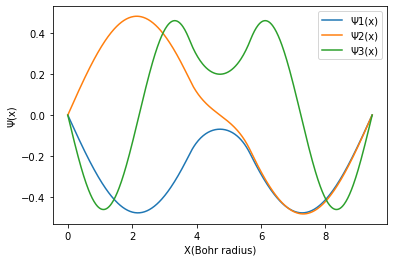

In [3]:
# part 1: Expand wave function with respect to eigenfunctions  
a_Bohr = 1.88973
Hartree = 27.211386
a = 1 * a_Bohr
l = 5 * a_Bohr
v0 = 50/Hartree
V = np.zeros((500,500)) #  Defining two metrices that data will be added to them 
T = np.zeros((500,500))
x = np.linspace(0,l,500)  

def Vmn(m,n,v0,l,a):  # Potential function 
    if m == n:
        v =(v0/l)*(a -(l/(n*np.pi))*np.cos(n*np.pi)*np.sin(n*np.pi*(a/l)))
    else : 
        v =((2*v0)/np.pi)*(((1/(m-n))*np.cos((m-n)*(np.pi/2))*np.sin((np.pi/l)*(m-n)*(a/2)))
                           -((1/(m+n))*np.cos((m+n)*(np.pi/2))*np.sin((np.pi/l)*(m+n)*(a/2))))
    return v

def Tmn(m,n,l):   # Kenetic Energy
    if m == n:
        t = (1/2)*(n*np.pi/l)**2
    else :
        t = 0
    return t

for m in range(1,501):  # Filling out the potential and kenetic energy metrices
    for n in range(1,501):
        V[m-1][n-1] = Vmn(m,n,v0,l,a)
        T[m-1][n-1] = Tmn(m,n,l)

def si(x,m,l,vec):   # eigenvalue functions 
    si = 0
    for n in range(1,501): 
        si = si+ (np.sqrt(2/l)*(vec[n-1][m-1]*np.sin((n*np.pi*x)/l)))
    return si

H = V + T  #  هامیلتونی بصورت جمع عنصر به عنصر ماتریس های پتانسیل و جنبشی
val , vec = la.eigh(H) #  eigenvalue and eigenvector by (linear algebra) liberaries
print(val[0:3]*Hartree) # first three eigenstates
for i in range(1,4):
    plt.plot(x,si(x,i,l,vec),label="Ψ"+str(i)+"(x)") # ploting the three eigenstates
    plt.xlabel("X(Bohr radius)")
    plt.ylabel("Ψ(x)")
    plt.legend()

In [4]:
#part 2 # Method 2: True Space 
def Vr(x,v0,l,a): # potential function
    if ((l/2)-(a/2))<=x<=((l/2)+(a/2)):
        return v0*2
    else:
        return 0
Vrr=np.zeros((400,400))  

xi=0
xf=l
h=(xf - xi)/400
c0,c1=2/(h**2),-1/(h**2)
x=np.arange(xi,xf,h) # In the first part we used 'linspace"'
Trr=(c0*np.diag(np.ones(400)) + c1*np.diag(np.ones(399),1) + c1*np.diag(np.ones(399),-1)) 


for i in range(0,len(x)): # Filling potential metrix
    Vrr[i][i]=Vr(x[i],v0,l,a)
    
H=Trr + Vrr
val,vec=la.eigh(H)
print(val[:3]*27.211386*(1/2))

[ 7.09745575  7.32679944 27.40481182]
